In [1]:
import numpy as np
import pandas as pd
from glob import glob
import re 

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# number of CPUs = 16

In [2]:
results_tsv = pd.read_csv("./benchmark_results.tsv", sep="\t")

In [3]:
log_files = glob("../benchmark_temp/deepfri*.log")

In [4]:
times = {}

for file in log_files:
    count = file.split("deepfri_")[1].split(".log")[0]
    with open(file, 'r') as f:
        log_content = f.read()
        start_pattern = r"^\[(.*?)\].*Starting"
        start_time = re.search(start_pattern, log_content, re.MULTILINE).group(1) 
        dl_pattern = r"^\[(.*?)\].*GO Biological Process"
        dl_time = re.search(dl_pattern, log_content, re.MULTILINE).group(1)
        times[count] = {
            "start_time": datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S"),
            "dl_time": datetime.strptime(dl_time, "%Y-%m-%d %H:%M:%S")
        }

/tmp/ipykernel_4164992/3078784809.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


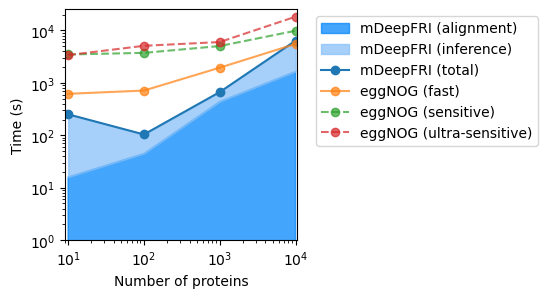

In [10]:
# make a plot count vs eggnog_fast 
# count vs deepfri
plt.figure(figsize=(3,3))

# Prepare sorted data for filling
results_sorted = results_tsv.sort_values('count')
pre_times = []
for c in results_sorted['count']:
    if str(c) in times:
        t = times[str(c)]
        delta = (t['dl_time'] - t['start_time']).total_seconds()
        pre_times.append(delta)
    else:
        pre_times.append(0)

# DeepFRI filled areas
# From start (0) to dl_time (pre_times): light purple
plt.fill_between(results_sorted['count'], 0, pre_times, color="#0085FABC", label='mDeepFRI (alignment)')
# From dl_time to total time: purple
plt.fill_between(results_sorted['count'], pre_times, results_sorted['deepfri_time'], color="#85BFF8B9", label='mDeepFRI (inference)')

# Add dots for total time of mDeepFRI to match previous style markers
plt.plot(results_sorted['count'], results_sorted['deepfri_time'], 'o-', label='mDeepFRI (total)')

# eggNOG plot
plt.plot(results_sorted['count'], results_sorted['eggnog_fast_time'], 'o-', label='eggNOG (fast)', alpha=0.7)
# eggNOG sensitive plot - use the same color, different marker
plt.plot(results_sorted['count'], results_sorted['eggnog_default_time'], 'o--', label='eggNOG (sensitive)', alpha=0.7)
# eggNOG ultra-sensitive plot
plt.plot(results_sorted['count'], results_sorted['eggnog_ultra-sensitive_time'], 'o--', label='eggNOG (ultra-sensitive)', alpha=0.7)

# make log scale
plt.xscale('log')
plt.yscale('log')
# add labels
plt.xlabel('Number of proteins')
plt.ylabel('Time (s)')
plt.xlim(9, 10500)
plt.ylim(1, max(results_tsv['eggnog_fast_time'].max(), results_tsv['deepfri_time'].max())*4)


# add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# save to benchmark dir 
plt.savefig("./benchmark_time_cpu_comparison.png", dpi=1200,
            bbox_inches='tight')

In [11]:
# gpu bechmark results
file = "./benchmark_results_gpu.tsv"
results_tsv_gpu = pd.read_csv(file, sep="\t")
logs = glob("../benchmark_temp_gpu/deepfri*.log")

/tmp/ipykernel_4164992/1572426240.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


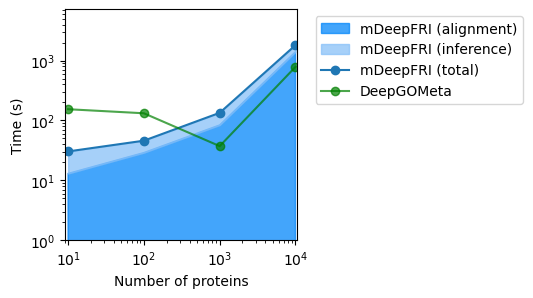

In [12]:
# plot the same for gpu
plt.figure(figsize=(3,3))

# extract times from logs again
times = {}
for file in logs:
    count = file.split("deepfri_")[1].split(".log")[0]
    with open(file, 'r') as f:
        log_content = f.read()
        start_pattern = r"^\[(.*?)\].*Starting"
        start_time = re.search(start_pattern, log_content, re.MULTILINE).group(1) 
        dl_pattern = r"^\[(.*?)\].*GO Biological Process"
        dl_time = re.search(dl_pattern, log_content, re.MULTILINE).group(1)
        times[count] = {
            "start_time": datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S"),
            "dl_time": datetime.strptime(dl_time, "%Y-%m-%d %H:%M:%S")
        }


# Prepare sorted data for filling
results_sorted = results_tsv_gpu.sort_values('count')
pre_times = []
for c in results_sorted['count']:
    if str(c) in times:
        t = times[str(c)]
        delta = (t['dl_time'] - t['start_time']).total_seconds()
        pre_times.append(delta)
    else:
        pre_times.append(0)
# DeepFRI filled areas
# From start (0) to dl_time (pre_times): light purple
plt.fill_between(results_sorted['count'], 0, pre_times, color="#0085FABC", label='mDeepFRI (alignment)')
# From dl_time to total time: purple
plt.fill_between(results_sorted['count'], pre_times, results_sorted['deepfri_time'], color="#85BFF8B9", label='mDeepFRI (inference)')   

# Add dots for total time of mDeepFRI to match previous style markers
plt.plot(results_sorted['count'], results_sorted['deepfri_time'], 'o-', label='mDeepFRI (total)')
# DeepGOMeta plot
plt.plot(results_sorted['count'], results_sorted['deepgometa_time'], 'o-', label='DeepGOMeta', alpha=0.7, color='green')

# make log scale
plt.xscale('log')
plt.yscale('log')
# add labels
plt.xlabel('Number of proteins')
plt.ylabel('Time (s)')
plt.xlim(9, 10500)

plt.ylim(1, max(results_tsv_gpu['deepgometa_time'].max(), results_tsv_gpu['deepfri_time'].max())*4)
# add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# save to benchmark dir 
plt.savefig("./benchmark_time_gpu_comparison.png", dpi=1200, bbox_inches='tight')